In [1]:
import numpy as np
from data.mnist import mnist_data
from data.utils import sample_and_categorize
from model.utils import clone_encoder

from train_vae import *

In [6]:
# 1. data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=20000)

In [7]:
print(samples.shape)
print(sample_labels.shape)

(20000, 28, 28, 1)
(20000,)


In [8]:
x_train = np.reshape(samples, (-1, 784))
x_train_samples = np.reshape(samples, (-1, 784))


print(x_train.shape)
print(x_train_samples.shape)

(20000, 784)
(20000, 784)


Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 252.5053
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 170.2478
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 149.0122
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 138.1046
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 130.0674
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 123.9260
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 119.5365
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 116.2000
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 113.6780
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 111.5176
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 109.5820
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 108.1705
Epoch 13/200


40/40 [==============================] - 0s 4ms/step - loss: 83.2336
Epoch 101/200
40/40 [==============================] - 0s 4ms/step - loss: 83.1517
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 83.1252
Epoch 103/200
40/40 [==============================] - 0s 4ms/step - loss: 83.0072
Epoch 104/200
40/40 [==============================] - 0s 4ms/step - loss: 83.0018
Epoch 105/200
40/40 [==============================] - 0s 4ms/step - loss: 82.9335
Epoch 106/200
40/40 [==============================] - 0s 4ms/step - loss: 82.8197
Epoch 107/200
40/40 [==============================] - 0s 4ms/step - loss: 82.8108
Epoch 108/200
40/40 [==============================] - 0s 4ms/step - loss: 82.7508
Epoch 109/200
40/40 [==============================] - 0s 4ms/step - loss: 82.6857
Epoch 110/200
40/40 [==============================] - 0s 4ms/step - loss: 82.6412
Epoch 111/200
40/40 [==============================] - 0s 4ms/step - loss: 82.5610
Epoch 112/200
40/4

40/40 [==============================] - 0s 4ms/step - loss: 79.2812
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 79.2677
Epoch 200/200
40/40 [==============================] - 0s 4ms/step - loss: 79.2896


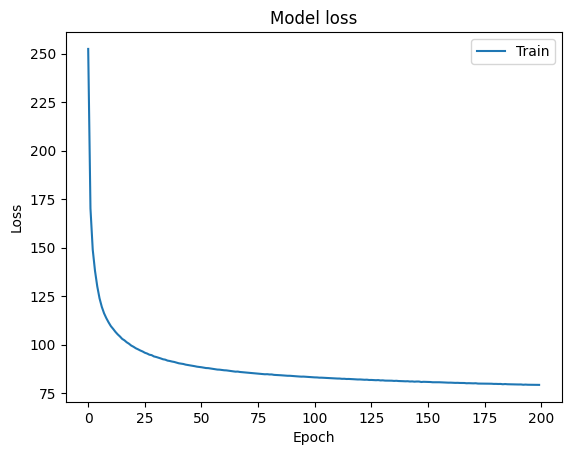

In [10]:
# 2. model: train a VAE
model_pre = VAE(latent_dim=12, name="vae2")

# Fit the model. Note that the 'eps' input is ignored because it is an Input tensor.
dummy_eps_input = np.zeros((len(x_train), model_pre.latent_dim))
history = model_pre.model.fit([x_train, dummy_eps_input], x_train, shuffle=True, epochs=200, batch_size=512)
plot_learning_curve(history)

In [11]:
    model_pre.save()


/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
classifier = model_pre.classifier()
encodings_pretrain = model_pre.encoder.predict(x_train_samples)
image_encoder = clone_encoder(model_pre.image_encoder())

In [8]:
encodings_samples = model_pre.encoder.predict(x_train_samples)

/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


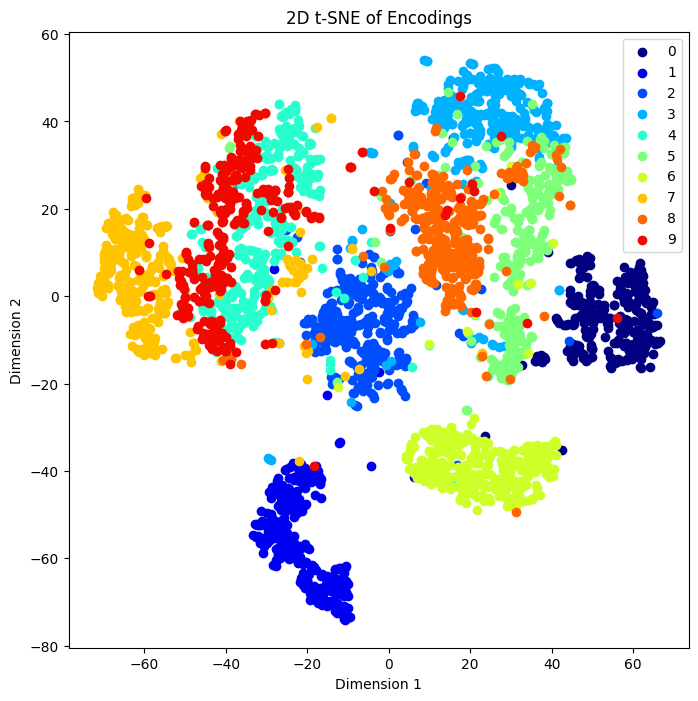

In [9]:
tsne = TSNE(n_components=2, random_state=42)
encodings_samples_2d = tsne.fit_transform(encodings_samples)
plot_encodings2d_with_labels(encodings_samples_2d, sample_labels)

In [10]:
cnn = load_model("trained_models/classifier.h5")

In [13]:
xai = xai_model(model_pre.decoder, cnn, input_shape=(12,))

In [24]:
z_batch = np.random.randn(1,12)

In [25]:
img = model_pre.decoder.predict(z_batch)
img = np.reshape(img[0], (28, 28))

y = xai.predict(z_batch)[0]

2024-02-16 12:20:08.440736: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2024-02-16 12:20:08.796301: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


[0.01928339 0.0065306  0.12596898 0.03367762 0.00160106 0.02386875
 0.0038276  0.09610945 0.6121962  0.07693634]


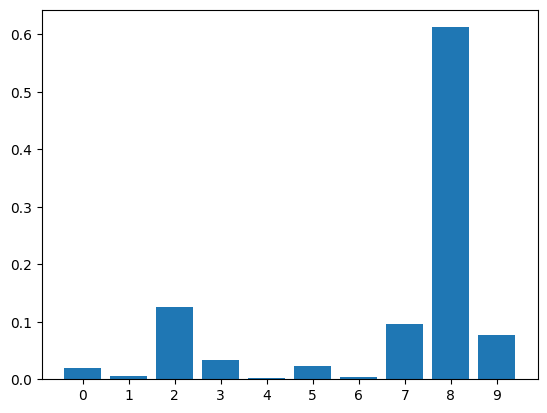

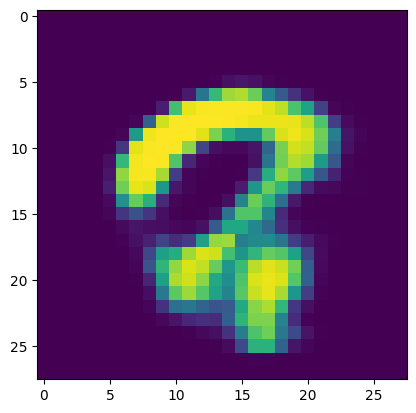

In [26]:
print(y)
plt.bar(range(len(y)), y)
plt.xticks(range(len(y)), range(len(y)))

plt.show()
plt.imshow(img)